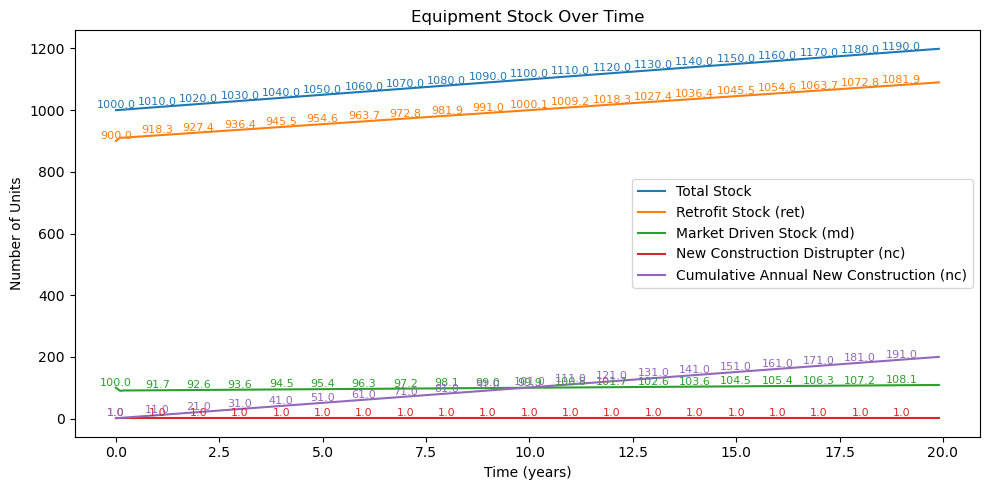

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_years = 20
dt = 1/10
time = np.arange(0, total_years, dt)
n = len(time)
nc_per_year = 10
nc = nc_per_year * dt 
nc_arr = np.full(n, nc)  # Create an array of 10s for plotting

# Initialize arrays
total_stock = np.zeros(n)
ret_stock = np.zeros(n)
md_stock = np.zeros(n)
# Create an array of cumulative annual totals for nc
nc_cumulative_annual = np.zeros(n)

# Initial conditions
total_stock[0] = 1000
ret_stock[0] = total_stock[0] * 0.9
md_stock[0] = total_stock[0] * 0.1

for t in range(1, n):
    # Add new construction to total stock
    total_stock[t] = total_stock[t-1] + nc

    # Calculate new substocks
    # All md_stock moves to ret_stock, 1/10th of ret_stock becomes md_stock # eul of condition with in the competition different how do we address
    new_md = ret_stock[t-1] * 0.1
    new_ret = (ret_stock[t-1] * 0.9) + md_stock[t-1]

    # All new construction into ret_stocks 
    ret_stock[t] = new_ret + nc 
    md_stock[t] = new_md 

    # Optional: enforce non-negativity
    ret_stock[t] = max(ret_stock[t], 0)
    md_stock[t] = max(md_stock[t], 0)


for t in range(n):
    # Find the start of the current year
    year_start = int(t // (1/dt)) * int(1/dt)
    # Sum nc for the current year up to time t
    nc_cumulative_annual[t] = np.sum(nc_arr[year_start:t+1])

nc_cumulative_total = np.cumsum(nc_arr)  

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, total_stock, label="Total Stock")
plt.plot(time, ret_stock, label="Retrofit Stock (ret)")
plt.plot(time, md_stock, label="Market Driven Stock (md)")
plt.plot(time, nc_arr, label="New Construction Distrupter (nc)")
plt.plot(time, nc_cumulative_total, label="Cumulative Annual New Construction (nc)")
for i in range(0, len(time), 10):
    plt.text(time[i], total_stock[i], f"{total_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:blue')
    plt.text(time[i], md_stock[i], f"{md_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], ret_stock[i], f"{ret_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], nc_arr[i], f"{nc_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:red')
    plt.text(time[i], nc_cumulative_total[i], f"{nc_cumulative_total[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:purple')
plt.xlabel("Time (years)")
plt.ylabel("Number of Units")
plt.title("Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()